In [1]:
%matplotlib inline
import pandas as pd
#import pandas.util.testing as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam

In [2]:
HG02666_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/rb_df_Divergence.csv")
HG02666= HG02666_1[HG02666_1['Divergence']!=100.0].set_index("Alu").copy()

HG01890_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/rb_df_Divergence.csv")
HG01890= HG01890_1[HG01890_1['Divergence']!=100.0].set_index("Alu").copy()

HG00358_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/rb_df_Divergence.csv")
HG00358= HG00358_1[HG00358_1['Divergence']!=100.0].set_index("Alu").copy()

HG01952_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/rb_df_Divergence.csv")
HG01952= HG01952_1[HG01952_1['Divergence']!=100.0].set_index("Alu").copy()

T2T_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/rb_df_Divergence.csv")
T2T= T2T_1[T2T_1['Divergence']!=100.0].set_index("Alu").copy()

HG01106_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/rb_df_Divergence.csv")
HG01106= HG01106_1[HG01106_1['Divergence']!=100.0].set_index("Alu").copy()

HG02011_1 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/rb_df_Divergence.csv")
HG02011= HG02011_1[HG02011_1['Divergence']!=100.0].set_index("Alu").copy()

In [3]:
HG01890_fix = HG01890.copy()
HG01952_fix = HG01952.copy()

In [4]:
for row in HG01890.index:
    if int(HG01890.at[row,'RepeatBlock']) == 8:
        HG01890_fix.at[row,'RepeatBlock'] =7
    elif int(HG01890.at[row,'RepeatBlock']) > 8:
        HG01890_fix.at[row,'RepeatBlock'] = int(HG01890.at[row,'RepeatBlock']) - 1
    else:
        continue
        
for row in HG01952.index:
    if int(HG01952.at[row,'RepeatBlock']) == 6:
        HG01952_fix.at[row,'RepeatBlock'] =5
    elif int(HG01952.at[row,'RepeatBlock']) > 6:
        HG01952_fix.at[row,'RepeatBlock'] = int(HG01952.at[row,'RepeatBlock']) - 1
    else:
        continue

In [5]:
def divBlock(df):
    df['DivBlock']='temp'
    
    for row in df.index:
        if df.at[row,'Divergence'] <= 1.0:
            df.at[row,'DivBlock'] = '0-1'
        elif df.at[row,'Divergence'] > 1.0 and df.at[row,'Divergence'] <= 2.0:
            df.at[row,'DivBlock'] = '1-2'
        elif df.at[row,'Divergence'] > 2.0 and df.at[row,'Divergence'] <= 4.0:
            df.at[row,'DivBlock'] = '2-4'
        elif df.at[row,'Divergence'] > 4.0 and df.at[row,'Divergence'] <= 6.0:
            df.at[row,'DivBlock'] = '4-6'
        elif df.at[row,'Divergence'] > 6.0:
            df.at[row,'DivBlock'] = '6-up'
        else:
            continue
    return(df)

In [6]:
HG02666_2 = divBlock(HG02666)
HG01890_2 = divBlock(HG01890_fix)
HG00358_2 = divBlock(HG00358)
HG01952_2 = divBlock(HG01952_fix)
T2T_2 = divBlock(T2T)
HG01106_2 = divBlock(HG01106)
HG02011_2 = divBlock(HG02011)

In [7]:
HG01952_2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster,Divergence,DivBlock
Alu,,,,,,,
C_AluY_1882515-1882806,0,2217,['45240 374 23.9 3.7 3.7 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.1,2-4
C_AluY_1884937-1885225,0,2411,['45243 384 18.9 9.1 3.0 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.2,2-4
C_AluY_1887352-1887643,0,2411,['45246 407 24.3 3.9 3.8 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.7,2-4
C_AluY_1889761-1890048,0,2402,['45249 379 26.9 2.9 3.9 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.2,2-4
C_AluY_1892175-1892463,0,2404,['45252 358 20.7 8.6 3.0 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.9,2-4
...,...,...,...,...,...,...,...
C_AluY_23036982-23037273,22,2397,['63514 416 24.2 2.9 4.2 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,6.5,6-up
C_AluY_23039375-23039666,22,2393,['63519 428 23.8 4.1 3.2 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,6.6,6-up
C_AluY_23041770-23042061,22,2393,['63522 438 23.9 2.7 4.3 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,6.2,6-up


In [8]:
columnsList = [str(orientation)+"_"+str(length)+"_"+str(divergence) for orientation in ['C', '+'] for length in set(HG02666['Block_Size']) for divergence in ['0-1','1-2','2-4','4-6','6-up']]

In [9]:
from scipy.spatial import distance

def buildProfile(df, columnsList):
    profileDF = pd.DataFrame(columns=columnsList, index=list(set(df['RepeatBlock']))).fillna(0)

    for block in set(df['RepeatBlock']):
        tempDF = df[df['RepeatBlock']==block].copy()
        
        for row in tempDF.index:
            profileDF.at[block, str(row.split("_")[0])+"_"+str(tempDF.at[row,'Block_Size'])+"_"+str(tempDF.at[row,'DivBlock'])]+=1
    

    heatDF = pd.DataFrame(index=list(set(df['RepeatBlock'])), columns=list(set(df['RepeatBlock'])))

    for row in heatDF.index:
        for column in heatDF.columns:
            heatDF.at[row,column] = float(1-float(distance.braycurtis(np.array(profileDF.loc[int(row)]), np.array(profileDF.loc[int(column)]))))
            
    return(heatDF, profileDF)

In [10]:
HG02666_bp, HG02666_pdf = buildProfile(HG02666_2, columnsList)
HG01890_bp, HG02666_pdf = buildProfile(HG01890_2, columnsList)
HG00358_bp, HG02666_pdf = buildProfile(HG00358_2, columnsList)
HG01952_bp, HG02666_pdf = buildProfile(HG01952_2, columnsList)
T2T_bp, HG02666_pdf = buildProfile(T2T_2, columnsList)
HG01106_bp, HG02666_pdf = buildProfile(HG01106_2, columnsList)
HG02011_bp, HG02666_pdf = buildProfile(HG02011_2, columnsList)

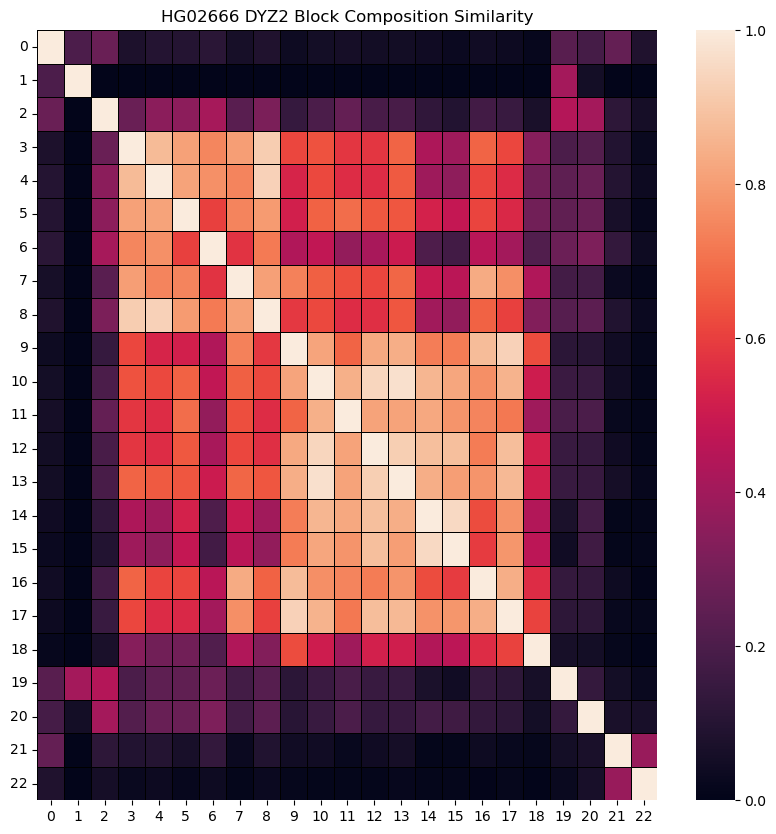

In [22]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG02666 DYZ2 Block Composition Similarity")
sns.heatmap(HG02666_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG02666_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

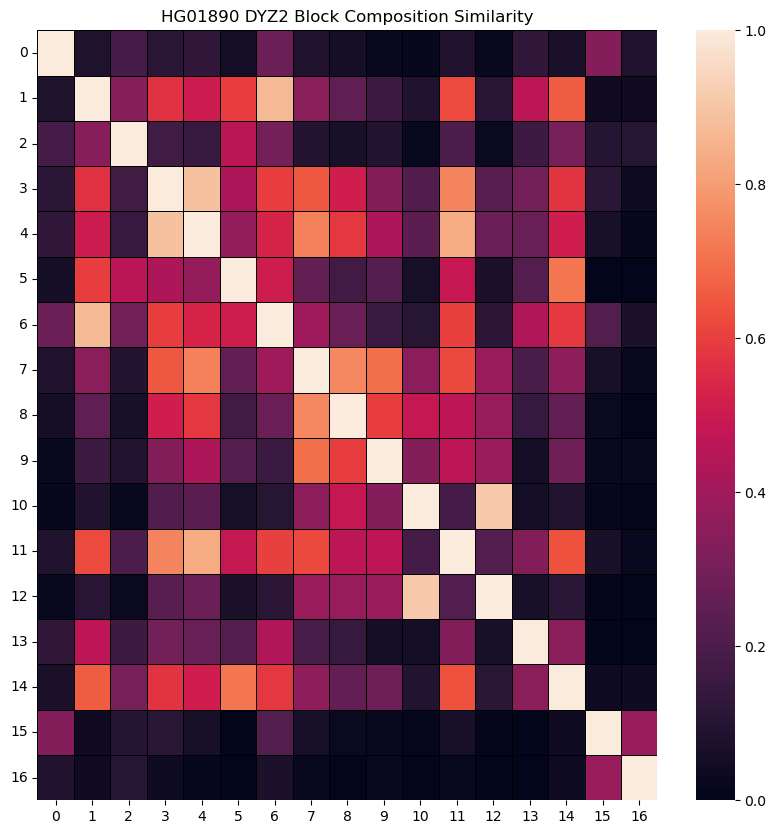

In [21]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG01890 DYZ2 Block Composition Similarity")
sns.heatmap(HG01890_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG01890_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

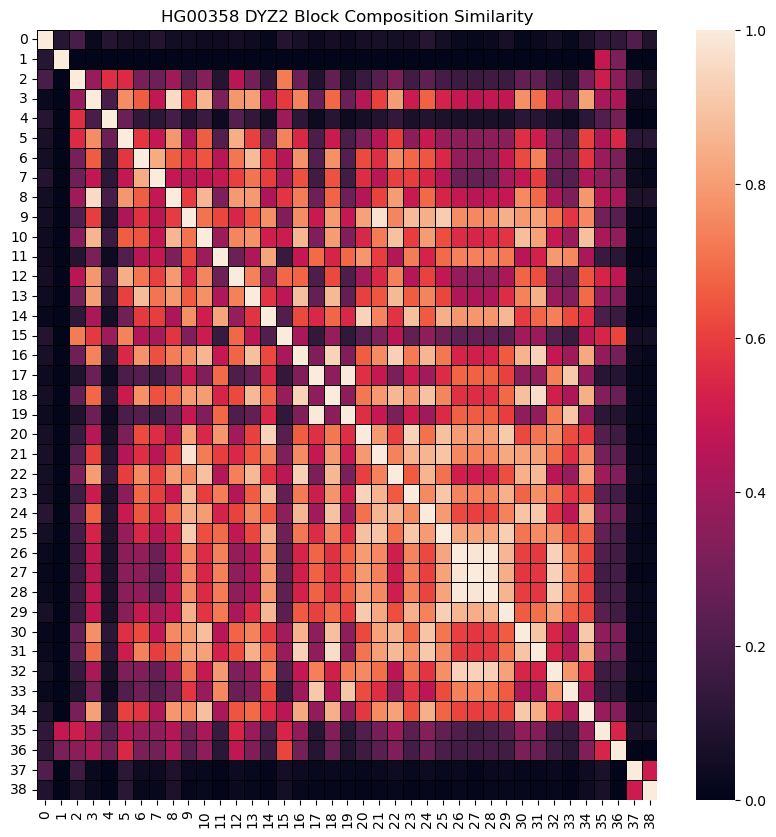

In [20]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG00358 DYZ2 Block Composition Similarity")
sns.heatmap(HG00358_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG00358_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

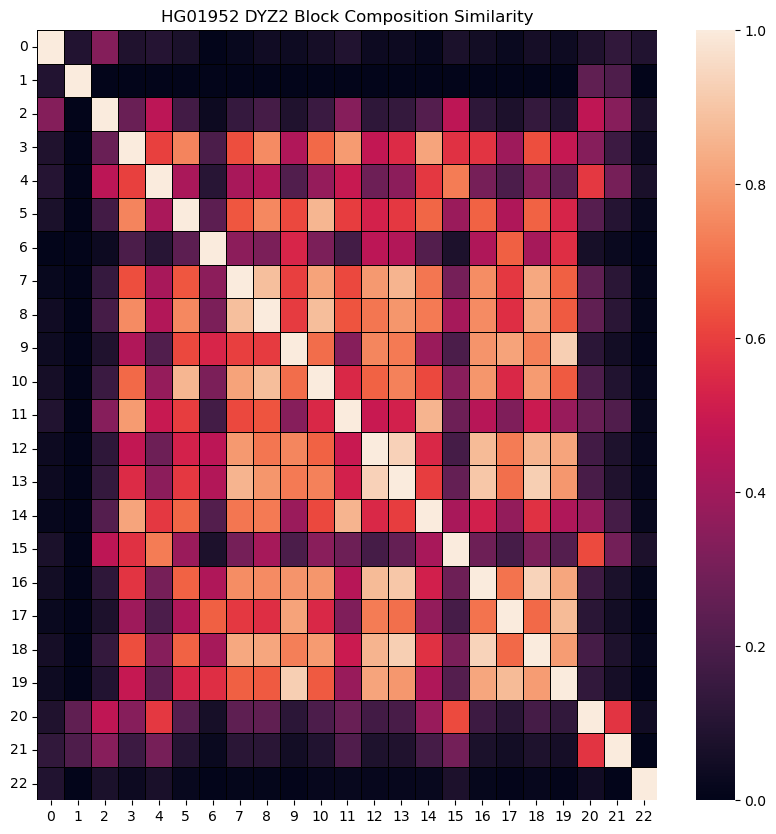

In [19]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG01952 DYZ2 Block Composition Similarity")
sns.heatmap(HG01952_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG01952_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

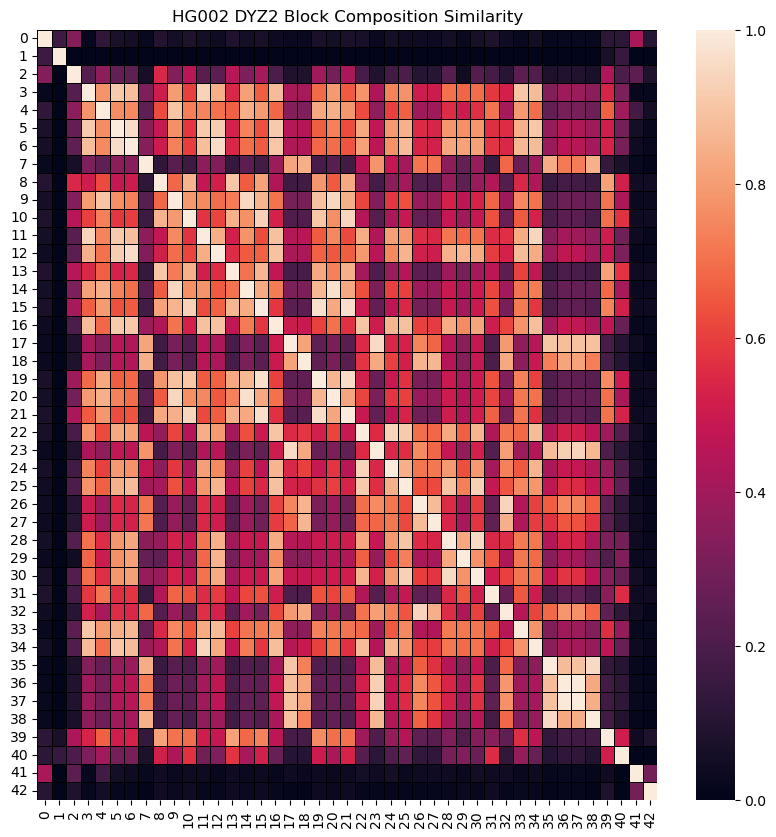

In [16]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG002 DYZ2 Block Composition Similarity")
sns.heatmap(T2T_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG002_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

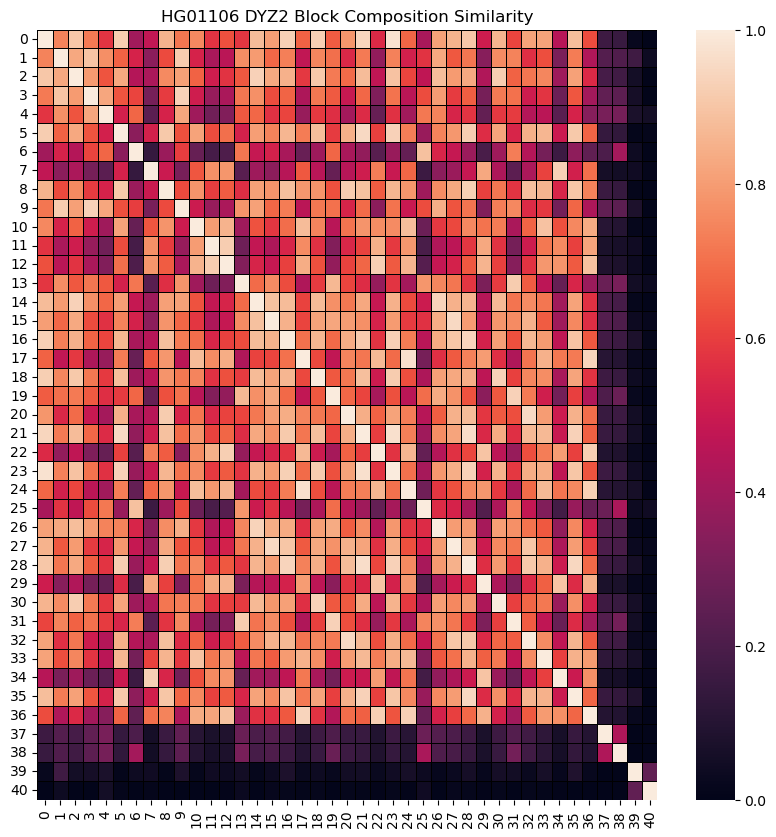

In [17]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG01106 DYZ2 Block Composition Similarity")
sns.heatmap(HG01106_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG01106_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

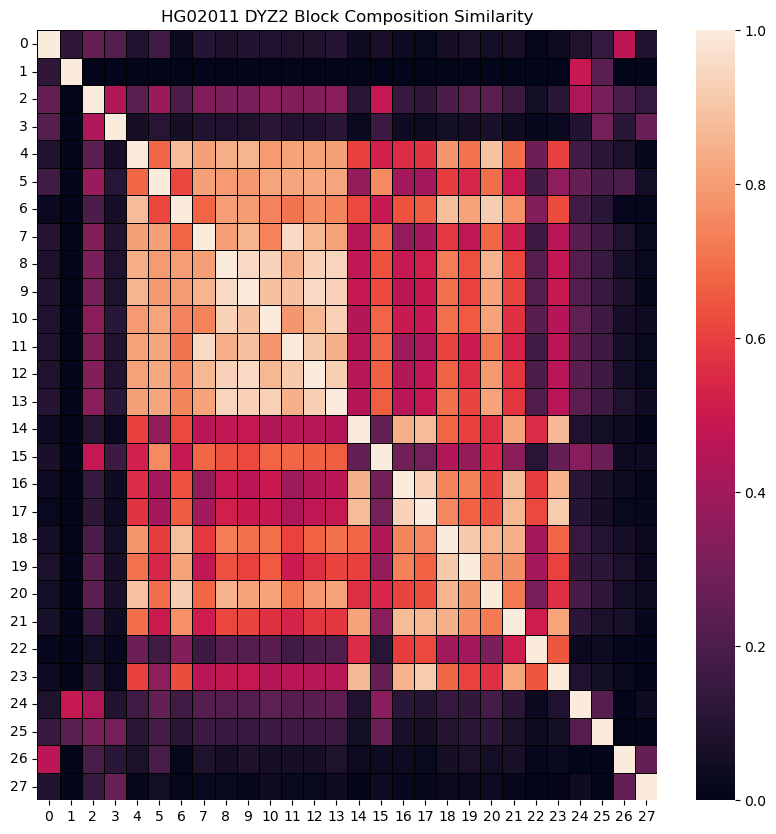

In [18]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
plt.title("HG02011 DYZ2 Block Composition Similarity")
sns.heatmap(HG02011_bp.astype('float'), linewidths=.7, annot=False, vmin=0, linecolor='black')
plt.yticks(rotation = 0)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/NewHeatmaps/HG02011_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()